In [1]:
import pandas as pd
import numpy as np
from load_in_data import load_data

In [2]:
def ab_merge(a_df,b_df,colname):
    
    sub_a = a_df.loc[:,["unique_id","Trddt",colname]]
    sub_b = b_df.loc[:,["unique_id","Trddt",colname]]
    
    sub_a.columns = ["unique_id","Trddt","a"+colname]
    sub_b.columns = ["unique_id","Trddt","b"+colname]
    
    ab_merge = sub_a.merge(sub_b,on=["unique_id","Trddt"])
    
    return ab_merge

In [3]:
a,b = load_data()

/Users/sunnyyang/Desktop/项目/AB股差值指数/load_in_data.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_price_df["unique_id"][a_price_df.Stkcd == a] = unique_id
/Users/sunnyyang/Desktop/项目/AB股差值指数/load_in_data.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_price_df["unique_id"][b_price_df.Stkcd == str(b)] = unique_id


In [5]:
drop_list = ["900950","900951","900953","900956","900957","900948","900935","900939","900929"]

In [6]:
indicator = [idx not in drop_list for idx in a.Stkcd]
a = a[indicator]

indicator = [idx not in drop_list for idx in b.Stkcd]
b = b[indicator]

In [10]:
price_ab_merge

,unique_id,Trddt,aClsprc,bClsprc
0,id_51,2000-01-04,10.30,3.160
1,id_51,2000-01-05,10.04,2.990
2,id_51,2000-01-06,10.51,3.200
3,id_51,2000-01-07,10.99,3.430
4,id_51,2000-01-10,11.44,3.580
...,...,...,...,...
386825,id_40,2019-12-25,7.73,0.398
386826,id_40,2019-12-26,7.68,0.400
386827,id_40,2019-12-27,7.59,0.400
386828,id_40,2019-12-30,7.74,0.397


In [11]:
price_ab_merge = ab_merge(a,b,"Clsprc")

In [12]:
price_ab_merge["ratio"] = price_ab_merge.aClsprc/price_ab_merge.bClsprc

In [16]:
a

,Stkcd,Indcd,Nindcd,Nnindcd,Trddt,Clsprc,Dnshrtrd,Dretwd,unique_id
0,000002,3,J,K70,2000-01-04,10.30,4574708,0.056410,id_51
1,000002,3,J,K70,2000-01-05,10.04,4613673,-0.025243,id_51
2,000002,3,J,K70,2000-01-06,10.51,7192031,0.046813,id_51
3,000002,3,J,K70,2000-01-07,10.99,13634936,0.045671,id_51
4,000002,3,J,K70,2000-01-10,11.44,14242486,0.117017,id_51
...,...,...,...,...,...,...,...,...,...
392210,600851,5,C81,C27,2019-12-25,7.73,1773097,-0.001292,id_40
392211,600851,5,C81,C27,2019-12-26,7.68,2014139,-0.006468,id_40
392212,600851,5,C81,C27,2019-12-27,7.59,2385319,-0.011719,id_40
392213,600851,5,C81,C27,2019-12-30,7.74,1956921,0.019763,id_40


In [23]:
ret_df = ab_merge(a,b,"Dretwd")

In [25]:
merge_df = price_ab_merge.merge(ret_df,on=["unique_id","Trddt"])

In [27]:
merge_df.columns = ["unique_id","date","a_price","b_price","ratio","a_ret","b_ret"]

In [29]:
merge_df.to_csv("ab_stock_cross_section.csv")

In [61]:
import matplotlib.pyplot as plt

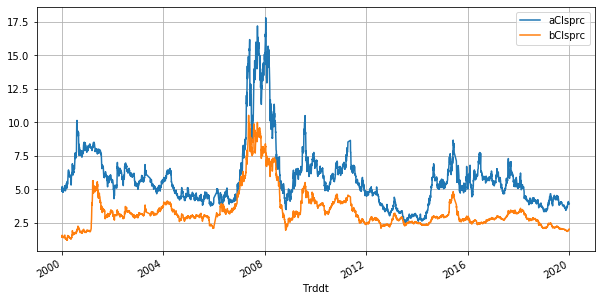

In [62]:
sub_df.iloc[:,2:4].plot(grid=True,figsize=(10,5))
plt.savefig("id2_ab_price")

In [145]:
def year(x):
    
    return x.year

def month(x):
    
    return x.month

def day(x):
    
    return x.day

In [147]:
price_ab_merge["year"] = price_ab_merge.Trddt.apply(year)
price_ab_merge["month"] = price_ab_merge.Trddt.apply(month)
price_ab_merge["day"] = price_ab_merge.Trddt.apply(day)

In [201]:
ave_ratio = price_ab_merge.iloc[:,4:].groupby(["year","month","day"]).mean()

In [202]:
date_list = []

for index in ave_ratio.index:
    
    date = str(index[0])+"-"+str(index[1])+"-"+str(index[2])
    date = pd.to_datetime(date)
    
    date_list.append(date)

date_list = pd.Series(date_list)

In [203]:
ave_ratio.index = date_list

In [204]:
ab_mean_df = ave_ratio[ave_ratio.index>"2002-01-01"]

In [205]:
med_ratio = price_ab_merge.iloc[:,4:].groupby(["year","month","day"]).median()

In [206]:
date_list = []

for index in med_ratio.index:
    
    date = str(index[0])+"-"+str(index[1])+"-"+str(index[2])
    date = pd.to_datetime(date)
    
    date_list.append(date)

date_list = pd.Series(date_list)

In [207]:
med_ratio.index = date_list

In [208]:
ab_median_df = med_ratio[med_ratio.index>"2002-01-01"]

In [209]:
std_ratio = price_ab_merge.iloc[:,4:].groupby(["year","month","day"]).std()

In [210]:
date_list = []

for index in std_ratio.index:
    
    date = str(index[0])+"-"+str(index[1])+"-"+str(index[2])
    date = pd.to_datetime(date)
    
    date_list.append(date)

date_list = pd.Series(date_list)

In [211]:
std_ratio.index = date_list

In [212]:
ab_std_df = std_ratio[std_ratio.index>"2002-01-01"]

In [213]:
ab_std_df.columns = ["std"]
ab_median_df.columns = ["med"]
ab_mean_df.columns = ["mean"]

In [217]:
ab_deviation_df = pd.concat([ab_mean_df,ab_median_df,ab_std_df],axis=1)

In [218]:
ab_deviation_df.to_csv("ab_deviation_ratio.csv")